<center>
  <h1>Introducción básica a Matplotlib (I)</h1>
  <h2>I302 - Aprendizaje Automático y Aprendizaje Profundo</h2>
  <h4>Universidad de San Andrés </h4>
</center>

Matplotlib es una biblioteca de visualización de datos en Python utilizada para crear gráficos estáticos, interactivos, animaciones y otras visualizaciones en 2D y 3D. Esta biblioteca viene instalada de forma predeterminada con Anaconda. 

Al igual que la biblioteca Numpy, Matplotlib tiene un alias ampliamente conocido y estandarizado entre los usuarios de Python. Este alias es *"plt"*.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Creamos una serie de datos para graficar
x = [0, 2, 4, 6, 8, 10]
y = [4, -4 ,0 ,2 ,-5, 1]
w = [5, 6, 7, -1, 4, -2, 0, 3, 1]

#Utilizamos Numpy para generar señales
t = np.linspace(0,1, 16000)

seno = np.sin(2*np.pi*3*t)
coseno = np.cos(2*np.pi*3*t)

Existen dos maneras principales de utilizar Matplotlib para graficar:

   - A traves de la [API de pyplot](https://matplotlib.org/3.5.1/tutorials/introductory/pyplot.html)
   - A traves de la [API orientada a objetos](https://matplotlib.org/3.5.1/api/index.html)
    
*(Nota: API → Interfaz de Programación de Aplicaciones. Cuando hablamos de API nos referimos a la forma de comunicarnos con una determinada herramienta, en este caso la biblioteca Matplotlib)*

## API de *pyplot*

La API de pyplot es una interfaz basada en funciones que permite crear gráficos rápidamente con un mínimo de código. Esta API es útil para tareas simples y rápidas, pero puede ser menos flexible y personalizable que la API orientada a objetos.



9
[5, 6, 7, -1, 4, -2]


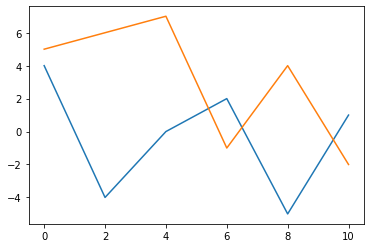

In [3]:
print(len(w))

w = w[:len(x)]
print(w)

plt.plot(x, y)
plt.plot(x, w)

#### Configuración de curvas

Podemos personalizar las propiedades de la curva agregando argumentos de entrada a la función *plot()*. Tambien podemos agregar una leyenda para definir que representa cada curva.

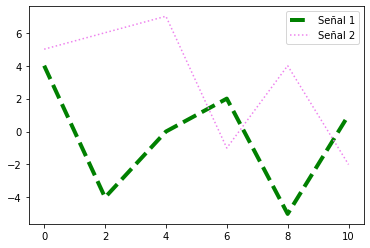

In [4]:
plt.plot(x, y, linestyle="--", color="g", linewidth=4, label="Señal 1")
plt.plot(x, w, linestyle=":", color="violet", label="Señal 2")
plt.legend()

plt.show()

#### Configuración del gráfico

Las propiedades del gráfico exceden las propiedades de las curvas, por lo que vamos a usar funciones propias de pyplot para realizar modificaciones en el gráfico.

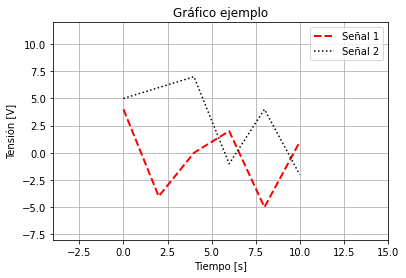

In [5]:
# Gráfico
plt.plot(x,y, linestyle="--", color="r", linewidth=2, label="Señal 1")
plt.plot(x,w, linestyle=":", color="black", label="Señal 2")

plt.legend()

# Título de gráfico
plt.title("Gráfico ejemplo")

# Nombre de ejes
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")

# Grilla
plt.grid()

# Límites de ejes
plt.xlim(-4, 15)
plt.ylim(-8, 12)

plt.show()

Existen muchos otros parámetros a configurar ademas de los vistos, tanto para los gráficos como para las curvas.

### Subplots

La función *subplots()* permite crear múltiples gráficos dentro de una figura. Con *subplots()*, se puede especificar el número de filas y columnas de subplots deseados, y Matplotlib creará una matriz de subplots que se pueden referenciar individualmente.

<img src="/home/linar/Desktop/ML/Clases/i302/Notebooks Introductorios/imagenes/subplots_orden.png" alt="Texto alternativo" width="500" height="400">

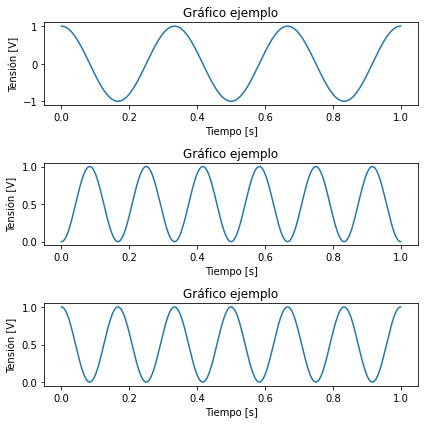

In [6]:
plt.figure(figsize=(6,6))

plt.subplot(3, 1, 1)
plt.plot(t, coseno)
plt.title("Gráfico ejemplo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")

plt.subplot(3, 1, 2)
plt.plot(t, seno**2)
plt.title("Gráfico ejemplo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")

plt.subplot(3, 1, 3)
plt.plot(t, coseno**2)
plt.title("Gráfico ejemplo")
plt.xlabel("Tiempo [s]")
plt.ylabel("Tensión [V]")


plt.tight_layout()

plt.savefig("grafico_ejemplo.png")
plt.show()

### Guardar un gráfico

In [7]:
plt.savefig("grafico_ejemplo.png")

<Figure size 432x288 with 0 Axes>

## API orientada a objetos

API orientada a objetos de Matplotlib es una interfaz más detallada y poderosa que permite mayor personalización y control sobre los gráficos. Esta API es más adecuada para tareas complejas y detalladas, y se basa en la creación de una instancia de la clase ***Figure*** y una instancia de la clase ***Axes*** que se utilizan para graficar los datos. 

Cuando queremos graficar un único gráfico, usamos la función ***subplots()*** sin ningun argumento de entrada.

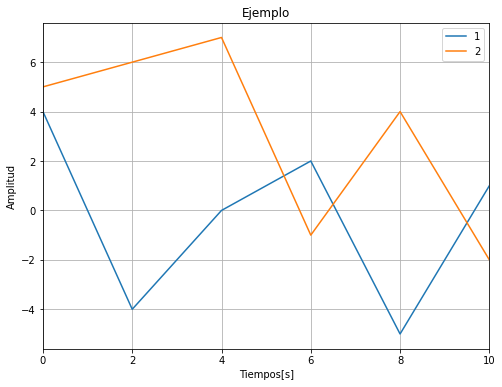

In [8]:
# Generamos los objetos fig y ax
fig, ax = plt.subplots()

# Propiedades de la figura
fig.set_size_inches(8,6)

#Propiedades de los ejes
ax.plot(x,y, label="1")
ax.plot(x,w, label="2")

ax.set_title("Ejemplo")
ax.set_xlabel("Tiempos[s]")
ax.set_ylabel("Amplitud")
ax.set_xlim(0,10)
ax.grid()
ax.legend()

plt.show()

### Subplots


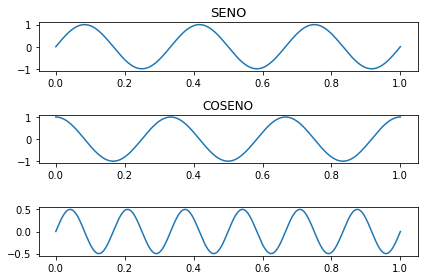

In [10]:
fig, ax = plt.subplots(3, 1)

type(ax)

ax[0].plot(t, seno)
ax[0].set_title("SENO", fontsize=13)

ax[1].plot(t, coseno)
ax[1].set_title("COSENO")

ax[2].plot(t, seno*coseno)

fig.tight_layout()


Como vimos en el ejemplo anterior, la función subplots() devuelve dos objetos: una figura y un array de ejes (Axes). 

El array de ejes se puede indexar para acceder a los ejes de un subplot específico. Cada subplot se referencia por su posición en el array de ejes, que se indexa utilizando corchetes. La sintaxis para acceder a los ejes de un subplot es [fila, columna] cuando la disposición de gráficos tiene más de una dimensión.

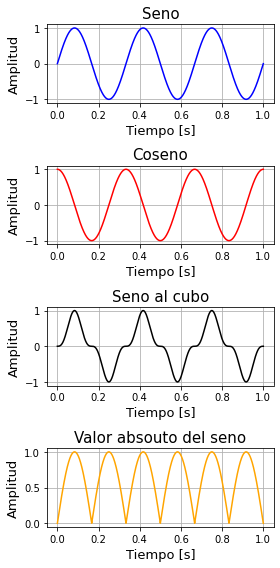

In [9]:
funciones = [seno, coseno, seno**3, np.abs(seno)]
nombres = ["Seno", "Coseno", "Seno al cubo", "Valor absouto del seno"]
colores = ["b", "r", "black", "orange"]

# Ejemplo de simplificacion
fig, axs = plt.subplots(len(funciones),1)

fig.set_size_inches(4,8)

for i in range(len(funciones)):
    axs[i].set_title(nombres[i], fontsize=15)
    axs[i].plot(t, funciones[i], colores[i])
    axs[i].set_xlabel('Tiempo [s]', fontsize=13)
    axs[i].set_ylabel('Amplitud', fontsize=13)
    axs[i].grid()

fig.tight_layout()

¿Cómo hacemos si queremos graficar estos mismos gráficos en una disposición de matrix de 2 filas y 2 columnas?

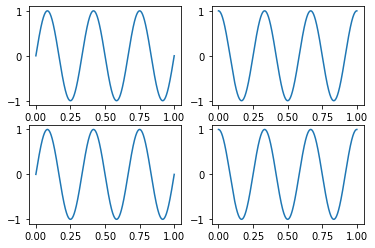

In [10]:
fig, axs = plt.subplots(2,2)

axs[0,0].plot(t, seno)
axs[0,1].plot(t, coseno)
axs[1,0].plot(t, seno)
axs[1,1].plot(t, coseno)

plt.show()

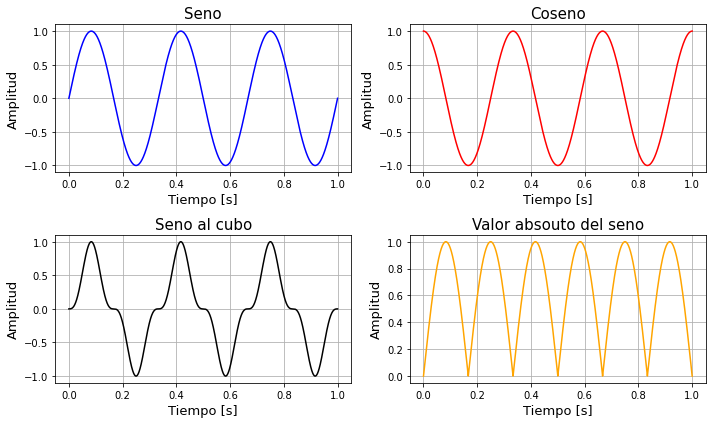

In [11]:
fig, axs = plt.subplots(2,2,figsize=(10,6))

for i, ax in enumerate(axs.flat):
    ax.set_title(nombres[i], fontsize=15)
    ax.plot(t, funciones[i], colores[i])
    ax.set_xlabel('Tiempo [s]', fontsize=13)
    ax.set_ylabel('Amplitud', fontsize=13)
    ax.grid()

fig.tight_layout()
plt.show()

## Otros tipos de gráficos

### Stem

La función **stem()** se utiliza para visualizar datos discretos, como secuencias de puntos o valores a lo largo de un eje.

<StemContainer object of 3 artists>

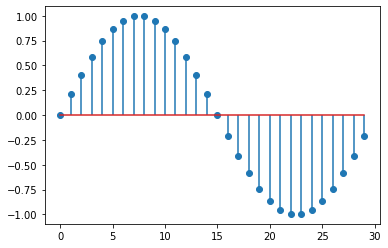

In [12]:
n = np.arange(30)
senoide = np.sin(2*np.pi/30*n)

plt.stem(senoide)

### Gráficos de barra

Los gráficos de barra son una manera muy efectiva de representar datos cuantitativos de manera discreta. Se suelen emplear cuando tenemos cantidades discriminadas según categorías.

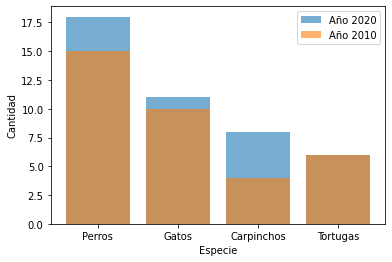

In [13]:
# Ejemplo base: Animales en un refugio.
especies = ["Perros", "Gatos", "Carpinchos", "Tortugas"]
cantidad_2010 = [15, 10, 4, 6]
cantidad_2020 = [18, 11 ,8 ,6]

plt.bar(especies,cantidad_2020, alpha=0.6, label="Año 2020")
plt.bar(especies,cantidad_2010, alpha=0.6, label="Año 2010")
plt.xlabel("Especie")
plt.ylabel("Cantidad")
plt.legend()
plt.show()

Otro ejemplo de gráfico de barras

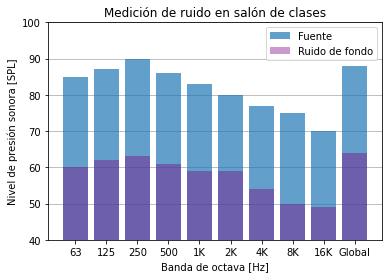

In [14]:
freq_center = ["63", "125", "250", "500", "1K", "2K", "4K", "8K", "16K", "Global"]
spl_fuente = [85, 87, 90, 86, 83, 80, 77, 75, 70, 88]
ruido = [60, 62, 63, 61, 59, 59, 54, 50, 49, 64]

plt.bar(freq_center, spl_fuente, alpha=0.7, label= "Fuente")
plt.bar(freq_center, ruido, alpha=0.4, color="purple", label="Ruido de fondo")

plt.title("Medición de ruido en salón de clases")
plt.xlabel("Banda de octava [Hz]")
plt.ylabel("Nivel de presión sonora [SPL]")
plt.ylim(40,100)
plt.grid(axis="y")
plt.legend()
#Llevar grilla hacia atrás
plt.gca().set_axisbelow(True)


## Galerías de gráficos con Python

Esta página muestra una amplia variedad de gráficos generados a partir de Matplotlib y otras bibliotecas de visualización. Se puede buscar por tipo de gráfico y contiene el código empleado para generarlos. Es bueno tenerla a mano para consultar cuando queremos darnos una idea de como hacer algun gráfico en particular.

**Python Graph Gallery (multiples librerías):** 
- https://python-graph-gallery.com/


**Galería oficial de Matplotlib:**
- https://matplotlib.org/stable/gallery/index.html

### Criterios a la hora de realizar un gráfico

La esencia de la visualización de datos es **generar una manera alternativa de ver la información para poder entenderla de mejor manera**. Este concepto nos impone la tarea de desarrollar un criterio a la hora de graficar para determinar que datos queremos representar y de que forma lo hacemos. Hay tres factores clave que debemos tener en cuenta:

1. **¿Que quiero mostrar?**

Es importante que antes de iniciar con un gráfico pensemos en qué información queremos representar: ¿Es una sola variable? ¿Es una comparación entre variables? ¿Es una distribución de datos?

2. **¿El gráfico se entiende?**

Una vez que generamos el gráfico debemos asegurarnos que el gráfico se entienda y nos permita hacer observaciones útiles. Es decir, el gráfico _debe aportar información que no podríamos llegar a ver mediante los datos crudos_. También debemos chequear que todas las unidades de las magnitudes representadas estén presentes.

3. **Decisiones estéticas**

Por ultimo pero no menos importante, debemos tener en cuenta ciertos criterios estéticos para que la visualización sea amena y clara para el lector: Paleta de colores, tamaño de fuente de los títulos, marcas y etiquetas de eje, etc.

### Errores comunes en gráficos

El objetivo de este documento es mostrar algunos de los errores más frecuentes a la hora de graficar, lo que suele generar dificultades para entender la información que queremos representar.

#### Ejemplo 1

<div>
<img src="/home/linar/Desktop/ML/Clases/i302/Notebooks Introductorios/imagenes/g4.png" width="700"/>
</div>

**PROBLEMA:** En esta imagen podemos ver que no hay información de ejes, es decir, se desconoce por completo que se está representando y la magnitud de esta información.

#### Ejemplo 2

<div>
<img src="/home/linar/Desktop/ML/Clases/i302/Notebooks Introductorios/imagenes/g1.png" width="700"/>
</div>

**PROBLEMA:** En principio, los ejes están etiquetados, pero las magnitudes deben estar definidas en función del sistema internacional de unidades (SI). Es decir que la unidad de tiempo debe representarse con la letra "s" o en alguna escala como ms(milisegundos) o ns(nanosegundos).

Por otro lado, la resolución temporal podría mejorarse. Es decir que el gráfico podría tener una mayor cantidad de marcas en el eje x para especificar los valores, de esta forma podríamos ver en que punto se encuentra el centro del pulso.

#### Ejemplo 3

<div>
<img src="/home/linar/Desktop/ML/Clases/i302/Notebooks Introductorios/imagenes/g3.png" width="700"/>
</div>

**PROBLEMA:** En principio el grafico no brinda información sobre sus ejes. Además de esto, se están representando 3 señales diferentes pero no hay una leyenda que especifique lo que representa cada una de estas.

#### Ejemplo 4

<div>
<img src="/home/linar/Desktop/ML/Clases/i302/Notebooks Introductorios/imagenes/g5.png" width="700"/>
</div>

**PROBLEMA:** El tamaño de fuente del título y los nombres de eje (como también las marcas de eje) son muy chicos respecto al tamaño de la figura. Además, las relaciones apaisadas en los gráficos pueden traer algunos problemas de visualización en determinadas situaciones.

#### Ejemplo 5

<div>
<img src="/home/linar/Desktop/ML/Clases/i302/Notebooks Introductorios/imagenes/g6.png" width="700"/>
</div>

**PROBLEMA:** En principio, las señales no están estiquetadas, pero el error principal de este gráfico es que se representa una cantidad excesiva de ciclos de las sinusoides, imposibilitando cualquier tipo de análisis o comparación.

#### Ejemplo 6

<div>
<img src="/home/linar/Desktop/ML/Clases/i302/Notebooks Introductorios/imagenes/g7.png" width="700"/>
</div>

**PROBLEMA:** Si bien el gráfico esta muy bien formateado, ya que tiene etiquetas, información de ejes y diferentes trazos de línea, las marcas del eje frecuencial son escasas y cuestra trabajo buscar la frecuencia exacta en la que se sitúa cada punto de las curvas. 



### Ejemplos de representación clara

#### Ejemplo 1

<div>
<img src="/home/linar/Desktop/ML/Clases/i302/Notebooks Introductorios/imagenes/ej_grafico2.png" width="700"/>
</div>

#### Ejemplo 2

<div>
<img src="/home/linar/Desktop/ML/Clases/i302/Notebooks Introductorios/imagenes/ej_grafico.jpg" width="700"/>
</div>
